In [15]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import yfinance as yf

In [16]:
start='2013-01-01'
end='2023-11-15'

stock='GOOG'

data=yf.download(stock,start,end)

C:\Users\suyas\AppData\Local\Temp\ipykernel_1880\1921195344.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data=yf.download(stock,start,end)
[*********************100%***********************]  1 of 1 completed


In [17]:
data.reset_index(inplace=True)

In [18]:
data

Price,Date,Close,High,Low,Open,Volume
Ticker,,GOOG,GOOG,GOOG,GOOG,GOOG
0,2013-01-02,17.907286,18.000135,17.741398,17.812459,102033017
1,2013-01-03,17.917686,18.122199,17.844646,17.948883,93075567
2,2013-01-04,18.271746,18.358404,18.016972,18.058073,110954331
3,2013-01-07,18.192020,18.306655,18.088773,18.209351,66476239
4,2013-01-08,18.156120,18.230399,17.936503,18.211582,67295297
...,...,...,...,...,...,...
2732,2023-11-08,132.472565,132.750909,131.379074,131.577889,15093600
2733,2023-11-09,130.911835,133.168425,130.732890,132.571965,17976500
2734,2023-11-10,133.267838,133.476603,130.096685,130.752788,20872900


In [19]:
ma_100_days=data.Close.rolling(100).mean()

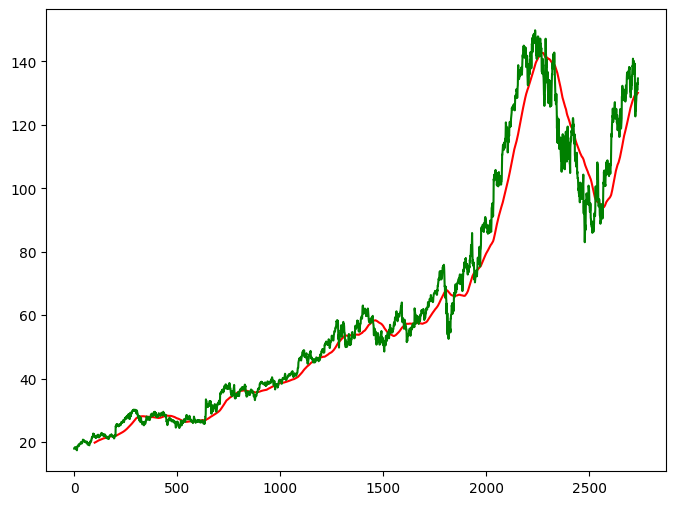

In [20]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days,'r')
plt.plot(data.Close,'g')
plt.show()

In [21]:
ma_200_days=data.Close.rolling(200).mean()

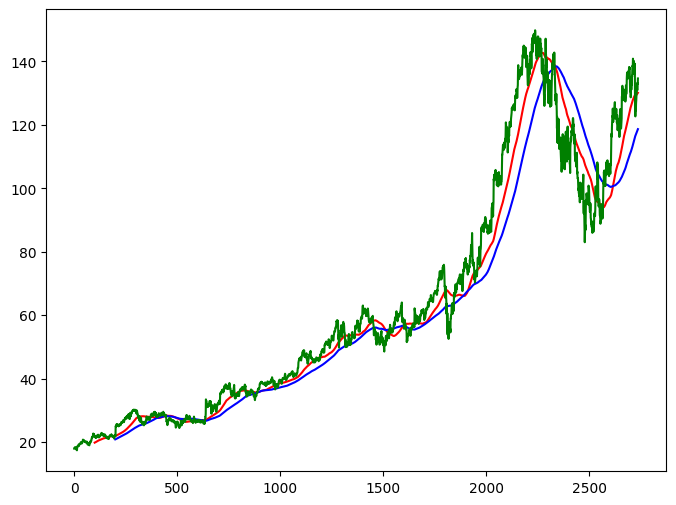

In [22]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days,'r')
plt.plot(ma_200_days,'b')
plt.plot(data.Close,'g')
plt.show()

In [23]:
data.dropna(inplace=True)

In [24]:
data_train=pd.DataFrame(data.Close[0:int(len(data)*0.80)])
data_test=pd.DataFrame(data.Close[int(len(data)*0.80):len(data)])

In [25]:
data_train.shape[0]

2189

In [26]:
data_test.shape[0]

548

In [27]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [28]:
data_train_scale=scaler.fit_transform(data_train)

In [29]:
x=[]
y=[]

for i in range(100,data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])

In [30]:
x,y=np.array(x),np.array(y)

In [31]:
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential


In [32]:
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(100, 1)),  
    LSTM(50, return_sequences=False),
    Dense(25),
    Dense(1)
])

c:\Users\suyas\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [33]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [34]:
model.fit(x,y,epochs=50,batch_size=32,verbose=1)

Epoch 1/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 11s 89ms/step - loss: 0.0205
Epoch 2/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 6s 92ms/step - loss: 2.6168e-04
Epoch 3/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 5s 80ms/step - loss: 2.5089e-04
Epoch 4/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 6s 94ms/step - loss: 2.5848e-04
Epoch 5/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 5s 81ms/step - loss: 2.3399e-04
Epoch 6/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 10s 80ms/step - loss: 2.4349e-04
Epoch 7/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 5s 77ms/step - loss: 2.2950e-04
Epoch 8/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 5s 79ms/step - loss: 2.4213e-04
Epoch 9/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 5s 80ms/step - loss: 2.1955e-04
Epoch 10/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 10s 80ms/step - loss: 1.9978e-04
Epoch 11/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 5s 79ms/step - loss: 1.9132e-04
Epoch 12/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 5s 79ms/step - loss: 2.0312e-04
Epoch 13/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 10s 77ms/step - loss: 2.1204e-04
Epoch 14/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 5s 79ms/step - loss: 1.9041e-04
Epoch 15/50
66/

In [35]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 95,705 (373.85 KB)

 Trainable params: 31,901 (124.61 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 63,804 (249.24 KB)

In [36]:
pas_100_days=data_train.tail(100)

In [37]:
data_test=pd.concat([pas_100_days,data_test],ignore_index=True)

In [38]:
data_test_scale=scaler.fit_transform(data_test)

In [39]:
x=[]
y=[]

for i in range(100,data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x,y=np.array(x),np.array(y)

In [40]:
y_predict=model.predict(x)

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step


In [41]:
scale=1/scaler.scale_

In [42]:
y_predict=y_predict*scale

In [43]:
y=y*scale

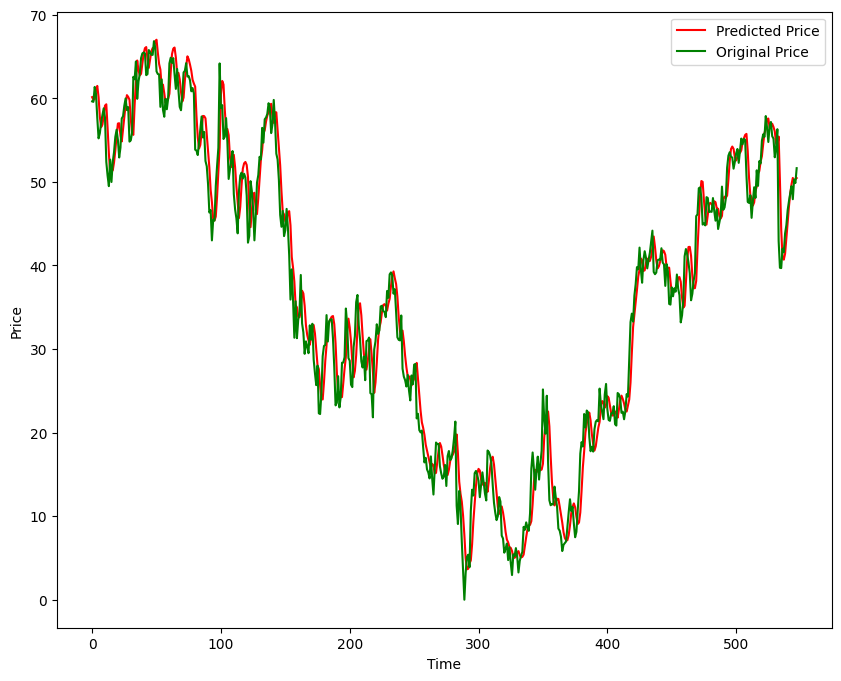

In [44]:
plt.figure(figsize=(10,8))
plt.plot(y_predict,'r',label='Predicted Price')
plt.plot(y,'g',label='Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [45]:
model.save('STOCK.keras')